In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the MNIST dataset
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data) 
m, n = data.shape  
np.random.shuffle(data)  

# Split into development and training sets
data_dev = data[0:1000].T  
Y_dev = data_dev[0] 
X_dev = data_dev[1:n]  
X_dev = X_dev / 255.0  

data_train = data[1000:m].T  
Y_train = data_train[0]  
X_train = data_train[1:n] 
X_train = X_train / 255.0  

In [8]:
def init_params():
    
    W1 = np.random.randn(10, 784) * 0.01  
    b1 = np.random.randn(10, 1) * 0.01  
    W2 = np.random.randn(10, 10) * 0.01  
    b2 = np.random.randn(10, 1) * 0.01  
    return W1, b1, W2, b2

def relu(Z):
    
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_relu(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = dZ2.dot(A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m  
    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(prediction, Y):
    return np.sum(prediction == Y) / Y.size

In [9]:
def gradient_decent(X, Y, iterations, alpha):
    
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            predictions = get_prediction(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy:.4f}")
    return W1, b1, W2, b2


In [10]:
W1, b1, W2, b2 = gradient_decent(X_train, Y_train, iterations=700, alpha=0.1)

Iteration: 0, Accuracy: 0.1119
Iteration: 50, Accuracy: 0.3306
Iteration: 100, Accuracy: 0.5279
Iteration: 150, Accuracy: 0.7491
Iteration: 200, Accuracy: 0.8176
Iteration: 250, Accuracy: 0.8462
Iteration: 300, Accuracy: 0.8632
Iteration: 350, Accuracy: 0.8740
Iteration: 400, Accuracy: 0.8825
Iteration: 450, Accuracy: 0.8878
Iteration: 500, Accuracy: 0.8927
Iteration: 550, Accuracy: 0.8962
Iteration: 600, Accuracy: 0.8986
Iteration: 650, Accuracy: 0.9008


In [33]:
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
predictions = get_prediction(A2)
accuracy = get_accuracy(predictions, Y_train)
print(accuracy)

0.902609756097561


In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [1]
Label:  1


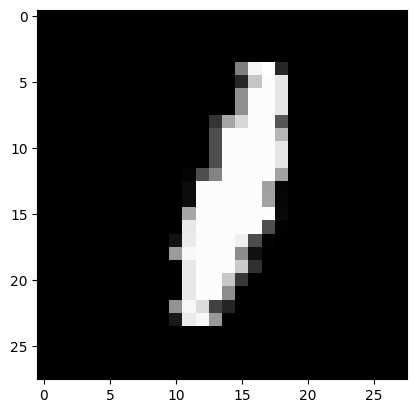

In [23]:
test_prediction(6, W1, b1, W2, b2)

In [27]:
dev_prediction = make_predictions(X_dev , W1, b1, W2, b2)
get_accuracy(dev_prediction, Y_dev)

0.909